#Background
##Employee absnteesism can contribute to missed deadlines, customer and profit loss. In and effort to gain more of an understanding of why employee are absent from work, I chose a data from the Machine Learning Repository, that tracked absenteeism from July 2007 to July 2010 at a courier company in Brazil. 

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
import scipy as sci


#Data Cleaning

## Inside the dataset there are multiple numerical categories, whose value determines a qualitative state.The categories have been parsed into categorical values using the pandas library. The categorical variables used are:


1.   Reason for Absence
2.   Seasons
3.   Social drinker
4.   Social smoker
5.   Education






In [201]:
data = pd.read_csv("Absenteeism_at_work.csv", delimiter=';')
data['Reason for absence'] = pd.Categorical(data['Reason for absence'])
data['Seasons'] = pd.Categorical(data['Seasons'])
data['Social drinker'] = pd.Categorical(data['Social drinker'])
data['Social smoker'] = pd.Categorical(data['Social smoker'])
data['Education'] = pd.Categorical(data['Education'])

mean_absen = data['Absenteeism time in hours'].mean()
s_absen = data['Absenteeism time in hours'].std()

norm_absen = (data['Absenteeism time in hours'] - mean_absen)/s_absen
data['Normal Absentee'] = norm_absen


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Normal Absentee
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,-0.219363
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,-0.519415
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,-0.369389
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,-0.219363
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,-0.369389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,1,2,1,0,1,90,172,30,8,0.080690
736,1,11,7,3,1,235,11,14,37,264.604,...,3,1,0,0,1,88,172,29,4,-0.219363
737,4,0,0,3,1,118,14,13,40,271.219,...,1,1,1,0,8,98,170,34,0,-0.519415
738,8,0,0,4,2,231,35,14,39,271.219,...,1,2,1,0,2,100,170,35,0,-0.519415


#Control Variables

##In order to predict the future values, I hypothezied that employee absenteeism will be based on the following values from the dataset


1.   ID
2.   Reason for absence
3.   Month of absence
4.   Day of the week
5.   Seasons
6.   Distance from Residence to Work
7.   Service time
8.   Work load Average/day
9.   Hit target
10.   Education
11.   Social worker
12.   Social drinker

##Upon initial observation of the dataset in its current state, there are no clear assumptions to be made on the reason for employee absenteeism. My hypothesis is that the hours of absenteeism is dependent upon the day of the week and month. I assumed this would be based on health issues that arise druing the change in seasons.  










In [202]:
data_sample = data[['Reason for absence','Month of absence', 'Day of the week', 'Seasons', 'Distance from Residence to Work','Service time','Age', 'Work load Average/day ','Hit target', 'Education', 'Social drinker', 'Social smoker','Absenteeism time in hours', 'Normal Absentee' ]]
data_sample

,Reason for absence,Month of absence,Day of the week,Seasons,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Education,Social drinker,Social smoker,Absenteeism time in hours,Normal Absentee
0,26,7,3,1,36,13,33,239.554,97,1,1,0,4,-0.219363
1,0,7,3,1,13,18,50,239.554,97,1,1,0,0,-0.519415
2,23,7,4,1,51,18,38,239.554,97,1,1,0,2,-0.369389
3,7,7,5,1,5,14,39,239.554,97,1,1,1,4,-0.219363
4,23,7,5,1,36,13,33,239.554,97,1,1,0,2,-0.369389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,36,13,33,264.604,93,1,1,0,8,0.080690
736,11,7,3,1,11,14,37,264.604,93,3,0,0,4,-0.219363
737,0,0,3,1,14,13,40,271.219,95,1,1,0,0,-0.519415
738,0,0,4,2,35,14,39,271.219,95,1,1,0,0,-0.519415


#Data Sampling and Training 
##To train and sample the dataset, the sklearn library "train_test_split" function was utilized. First by creating a x and y sample numpy array, then feeding those values into the function as input variables.

##The data was sampled using an 80/20 split. 

In [151]:
x_sample = np.array(data_sample.drop(['Absenteeism time in hours'], axis = 1))
y_sample = np.array(data_sample['Absenteeism time in hours'])
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=.20, random_state=0)


##Observing the initial dataset we can see that mean absenteeism in hours is 6.92, with the month on average being June. One value that stands out is the distance from work being a small values, which indicates that the distance is not a main factor in determining absenteeism. 

In [152]:
pd.DataFrame(data_sample).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month of absence,740.0,6.324324e+00,3.436287,0.000000,3.000000,6.000000,9.00000,12.000000
Day of the week,740.0,3.914865e+00,1.421675,2.000000,3.000000,4.000000,5.00000,6.000000
Distance from Residence to Work,740.0,2.963108e+01,14.836788,5.000000,16.000000,26.000000,50.00000,52.000000
Service time,740.0,1.255405e+01,4.384873,1.000000,9.000000,13.000000,16.00000,29.000000
Age,740.0,3.645000e+01,6.478772,27.000000,31.000000,37.000000,40.00000,58.000000
Work load Average/day,740.0,2.714902e+02,39.058116,205.917000,244.387000,264.249000,294.21700,378.884000
Hit target,740.0,9.458784e+01,3.779313,81.000000,93.000000,95.000000,97.00000,100.000000
Absenteeism time in hours,740.0,6.924324e+00,13.330998,0.000000,2.000000,3.000000,8.00000,120.000000
Normal Absentee,740.0,9.601929e-18,1.000000,-0.519415,-0.369389,-0.294376,0.08069,8.482161


#Extra Tree Regression Model
##An Extremely Randomized Tree Classifier was used from the sklearn dataset to predict the future values of absenteeism. Because there are many categorical variables, this model was chosen to maintain the original training set, and provide the most in depth randomized sample. 

In [154]:
model = ExtraTreesRegressor(max_depth = 11).fit(x_train,y_train)
pred = model.predict(x_test)
output_df = pd.DataFrame(x_test, columns= ['Reason for absence','Month of absence', 'Day of the week', 'Seasons', 'Distance from Residence to Work','Service time','Age', 'Work load Average/day ','Hit target', 'Education', 'Social drinker', 'Social smoker', 'Normal Absentee'])
output_df_act = pd.DataFrame(x_test, columns= ['Reason for absence','Month of absence', 'Day of the week', 'Seasons', 'Distance from Residence to Work','Service time','Age', 'Work load Average/day ','Hit target', 'Education', 'Social drinker', 'Social smoker','Normal Absentee'])
pred_df = pd.DataFrame(pred)




#R-squared (R2) Score
## An R2 score has been used to evaluate the accuracy of the predictive model. As we see from an R2 score of 0.999, the model has 99% accuracy.

In [163]:
print(r2_score(y_test, pred_df))

0.999150933024961


#Education as a factor
##The model shows that employee absenteeism is determinant upon education level. This can be attributed to the committment of the job as a career, the outlook of continuing education for higher pay. Graphing the the data using facetted histogram we can see our distrbution of absentee hours by education. 

##The data clearly indicated that most absentee hours are produced by employees with a lower education level, with those who have only an high school diploma producing the most absentee hours. 

Text(0.5, 6.79999999999999, 'Masters and Doctors')

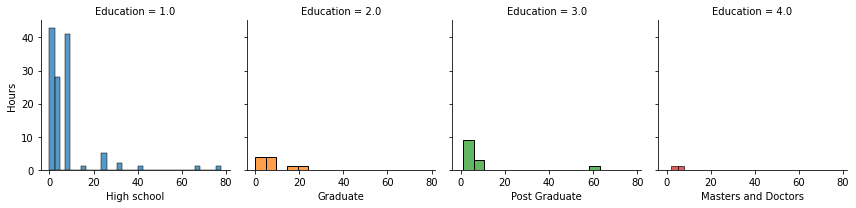

In [190]:
output_df['Absentee'] = pred_df
output_df_act['Absentee'] = pd.DataFrame(y_test) 
g = sns.FacetGrid(output_df, col = 'Education', hue = 'Education')
g.map(sns.histplot,'Absentee')
g.set_ylabels("Hours")
g.axes[0,0].set_xlabel('High school')
g.axes[0,1].set_xlabel('Graduate')
g.axes[0,2].set_xlabel('Post Graduate')
g.axes[0,3].set_xlabel('Masters and Doctors')


##View data as a box plot, we can see the education level that has the most extreme values as those with only a high school education.

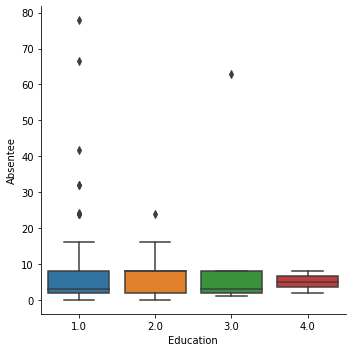

In [188]:
sns.catplot(data = output_df, x = 'Education', y = 'Absentee', kind = 'box')

##By producing a table we can see the mean absentee hours of 7.13 hours.

In [166]:
output_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Reason for absence,148.0,18.668919,8.894995,0.000000,13.000000,22.500000,26.00000,28.000000
Month of absence,148.0,6.405405,3.345904,0.000000,3.000000,7.000000,9.00000,12.000000
Day of the week,148.0,4.060811,1.439134,2.000000,3.000000,4.000000,5.00000,6.000000
Seasons,148.0,2.574324,1.125410,1.000000,2.000000,3.000000,4.00000,4.000000
Distance from Residence to Work,148.0,28.567568,14.237137,5.000000,16.000000,26.000000,42.00000,52.000000
Service time,148.0,12.520270,3.892203,3.000000,9.750000,12.000000,16.00000,18.000000
Age,148.0,36.932432,7.005986,27.000000,30.750000,37.000000,40.00000,58.000000
Work load Average/day,148.0,269.798412,38.834156,205.917000,244.387000,263.002500,284.23650,378.884000
Hit target,148.0,94.317568,3.933179,81.000000,92.000000,95.000000,97.25000,100.000000
Education,148.0,1.283784,0.680541,1.000000,1.000000,1.000000,1.00000,4.000000


#Plotting the original data to compare its distribution in relation to the predicted values.

Text(0.5, 6.79999999999999, 'Masters and Doctors')

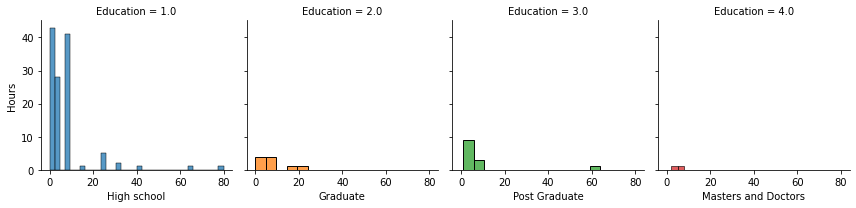

In [189]:
g = sns.FacetGrid(output_df_act, col = 'Education', hue = 'Education')

g.map(sns.histplot,'Absentee')
g.set_ylabels("Hours")
g.axes[0,0].set_xlabel('High school')
g.axes[0,1].set_xlabel('Graduate')
g.axes[0,2].set_xlabel('Post Graduate')
g.axes[0,3].set_xlabel('Masters and Doctors')


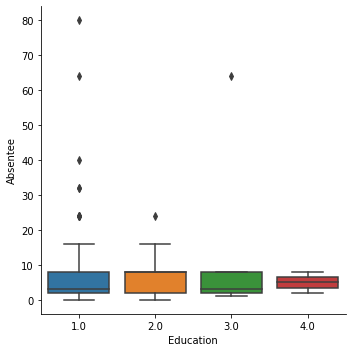

In [191]:
sns.catplot(data = output_df_act, x = 'Education', y = 'Absentee', kind = 'box')


#Placing the original data in the table we see the mean absentee hours to be 7.12 hours, which is almost identical to our predicted values.

In [18]:
output_df_act.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,148.0,18.972973,10.673220,1.000,11.000,20.0000,28.0000,36.000
Reason for absence,148.0,18.668919,8.894995,0.000,13.000,22.5000,26.0000,28.000
Month of absence,148.0,6.405405,3.345904,0.000,3.000,7.0000,9.0000,12.000
Day of the week,148.0,4.060811,1.439134,2.000,3.000,4.0000,5.0000,6.000
Seasons,148.0,2.574324,1.125410,1.000,2.000,3.0000,4.0000,4.000
Distance from Residence to Work,148.0,28.567568,14.237137,5.000,16.000,26.0000,42.0000,52.000
Service time,148.0,12.520270,3.892203,3.000,9.750,12.0000,16.0000,18.000
Age,148.0,36.932432,7.005986,27.000,30.750,37.0000,40.0000,58.000
Work load Average/day,148.0,269.798412,38.834156,205.917,244.387,263.0025,284.2365,378.884
Hit target,148.0,94.317568,3.933179,81.000,92.000,95.0000,97.2500,100.000


In [171]:
highschool = data_sample[data_sample['Education'] == 1]
mean_high = highschool['Absenteeism time in hours'].mean()
graduate = data_sample[data_sample['Education'] == 2]
mean_graduate = graduate['Absenteeism time in hours'].mean()
post_grad = data_sample[data_sample['Education'] == 3]
mean_post_grad = post_grad['Absenteeism time in hours'].mean()
mast_doc = data_sample[data_sample['Education'] == 4]
mean_mast_doc = mast_doc['Absenteeism time in hours'].mean()

mean_data = [['High School',mean_high], ['Graduate',mean_graduate] , ['Post Grad',mean_post_grad], ['Masters or PhD',mean_mast_doc]]
mean_data_df = pd.DataFrame(mean_data, columns=['Education','Mean Absentee Hours'])

#Conclusion
##By plotting side by side bar graphs we can see how on average, employees with a lower level of education tend to produce the most absentee hours. This means that the distance from work and average workload are not factors in how many hours are missed. It does indicate however, that a rise in pay may produce less hours of absenteeism.

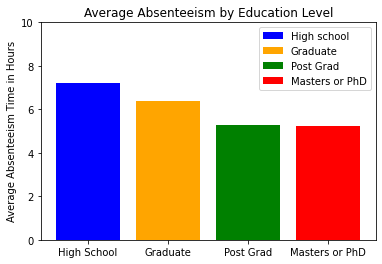

In [182]:
g = plt.bar(mean_data_df['Education'], mean_data_df['Mean Absentee Hours'], color = ['blue','orange','green','red'])
plt.ylabel("Average Absenteeism Time in Hours")
plt.title("Average Absenteeism by Education Level")
plt.ylim(0,10)
plt.legend(iter(g), ("High school", "Graduate","Post Grad","Masters or PhD"))

#References
##GeeksforGeeks. (2020, July 2). ML | Extra Tree Classifier for Feature Selection. https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/UCI

##Machine Learning Repository: Absenteeism at work Data Set. (2018). Https://Archive.Ics.Uci.Edu/Ml/Datasets/Absenteeism+at+work. https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+workWhat 

##Is R-Squared? (2021, September 12). Investopedia. https://www.investopedia.com/terms/r/r-squared.asp#:%7E:text=In%20other%20fields%2C%20the%20standards,would%20show%20a%20low%20correlation.